## Práctica de árboles de decisión

- [Árboles de decisión para clasificación](#Árboles-de-decisión-para-clasificación)
- [Extracción de variables utilizando árboles de decisión](#Extracción-de-variables-utilizando-árboles-de-decisión)
- [Árboles de decisión para problemas de regresión](#Árboles-de-decisión-para-problemas-de-regresión)

Importamos todas las librerías que vamos a utilizar inicialmente. Posteriormente iremos importando las librerías específicas de cada apartado de la práctica.

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

En esta primera parte de la práctica vamos a analizar el comportamiento de los árboles de decisión para resolver problemas de clasificación. En concreto, para desarrollar la práctica vamos a trabajar con el dataset Iris (flores de lirio). 

La librería scikit-learn (sklearn) nos ofrece dicho dataset de forma automática. Para ello hay que importar en primer lugar el paquete datasets y luego utilizar la función load_iris(), que carga el contenido del conjunto de datos Iris en la variable utilizada para tal efecto.

La información sobre la función load_iris() se puede encontrar en la URL: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris


In [2]:
# Se importa el paquete datasets
from sklearn import datasets
# Se lee el dataset iris y se almacena en la variable del mismo nombre
iris = datasets.load_iris()

En la variable iris tenemos los datos asociados a los 150 ejemplos de la base de datos. En concreto:
* Los datos de entrada (longitud y anchura de pétalo y de sépalo) están en el campo data (iris.data)
* Las salidas (clases) están en el campo target (iris.target)
* Los nombres de las clases están en el campo taget_names (iris.target_names)
* Los nombres de las variables de entrada están en el campo feature_names (iris.feature_names)
* La descripción del dataset está en el campo DESCR (iris.DESCR)

Mostrar los datos de todos los campos (los 5 primeros ejemplos) para entender bien el conjunto de datos.

In [3]:
# Se imprime la información del dataset
print(iris.data[:5,:])
print(iris.target[:5])
print(iris.target_names)
print(iris.feature_names)
print(iris.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    

### Árboles de decisión para clasificación

En esta práctica vamos a utilizar dos de los algoritmos más utilizados para generar árboles de decisión: C4.5 y CART. Utilizaremos ambos algoritmos para resolver el problema de clasificación de la flor Iris.

En primer lugar vamos a aprender a utilizar el paquete de la librería scikit-learn (sklearn) que corresponde al paradigma de los árboles de decisión. Estos clasificadores están almacenados en el paquete tree, por tanto en primer lugar debemos importar dicho paquete.

In [4]:
# Se importa el paquete de árboles de decisión
from sklearn import tree

Dentro de dicho paquete está la clase específica que permite crear árboles de decisión para resolver problemas de clasificación: DecisionTreeClassifier. 

Esta clase tiene varios parámetros que se pueden utilizar para determinar el árbol de decisión a utilizar (C4.5 o CART) así como varios de sus parámetros que determinarán su posterior comportamiento. Toda la información de esta clase se puede consultar en la URL: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. La llamada al constructor del árbol de decisión es la siguiente:

clasificador = tree.DecisionTreeClassifier(criterion=tipoMedidaImpurezaNodo, min_samples_split=numeroMinimoEjemplosRama, min_samples_leaf= numeroMinimoEjemplosHoja)

Los valores de los parámetros que determinan el comportamiento del clasificador (parte derecha de la asignación de los parámetros criterion, min_samples_split y min_samples_leaf) son los siguientes:
* tipoMedidaImpurezaNodo: tipo de medida de la impureza del nodo
    * ‘gini’: indice GINI, árbol de decisión CART
    * ‘entropy’: ratio de ganancia de información, árbol de decisión C4.5
* numeroMinimoEjemplosRama: número mínimo de ejemplos necesario para dividir un nodo (por defecto es 2)
* numeroMinimoEjemplosHoja: número mínimo de ejemplos para generar una hoja (por defecto es 1)

In [7]:
# Se importa el paquete de métricas de rendimiento
from sklearn import metrics

# LLamada al constructor del árbol de decisión
arbolDecision = tree.DecisionTreeClassifier()
# Entrenamiento del árbol de decisión
arbolDecision = arbolDecision.fit(iris.data, iris.target)
# Se realizan las predicciones del árbol de decisión con los ejemplos de entrenamiento
predicciones = arbolDecision.predict(iris.data)
# Se obtiene el rendimiento (accuracy)
accuracy = metrics.accuracy_score(predicciones, iris.target)*100.0
# Se imprime la información del tipo de árbol, rendimientos, número de nodos y profundidad máxima
print(accuracy)
print(metrics.confusion_matrix(predicciones, iris.target))
print("Numero de nodos {}".format(arbolDecision.tree_.node_count))
print("Maxima profundidad {}".format(arbolDecision.tree_.max_depth))

100.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Numero de nodos 17
Maxima profundidad 5


Vamos a mostrar visualmente los árboles de decisión aprendidos. Para ello, scikit-learn nos ofrece una función (del paquete tree) que puede utilizarse para mostrarlos gráficamente: export_graphviz. Toda la información de esta función se puede consultar en la URL: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz. Su llamada y los argumentos que recibe son los siguientes:

    tree.export_graphviz(clasificador, out_file=nombreFicheroDot, feature_names=nombresVariables, class_names=nombresClases, filled=True, rounded=True, special_characters=True)

El significado de las variables es el siguiente:
* clasificador: el árbol de decisión a mostrar, el obtenido tras realizar el aprendizaje.
* nombreFicheroDot: nombre del fichero en el cual vamos a almacenar el árbol de decisión. Por ejemplo ‘arbol.dot’
    * Posteriormente será transformado a png para visualizarlo.
* nombresVariables: nombres de las variables de entrada, en este caso iris.feature_names
* nombresClases: nombres de las clases del problema, en este caso iris.target_names
* Los 3 últimos parámetros (filled, rounded y special_characters) hay que dejarlos como están en este ejemplo (True) para que el árbol de decisión tenga una visualización más agradable

Para poder ejecutar esta instrucción el fichero arbol.dot tiene que estar abierto y que de esta forma se pueda escribir el árbol generado. Para ello se utilizan las siguientes dos instrucciones:

    with open(‘arbol.dot’, 'w') as f:
        tree.export_graphviz(clasificador, out_file=f, feature_names=nombresVariables, class_names=nombresClases, filled=True, rounded=True, special_characters=True)

Observad que primero se abre el archivo arbol.dot (este nombre lo especifica el usuario, es decir, puede cambiar) y se guarda su manejador en la variable f. Esta variable se utiliza como valor para el parámetro nombreFicheroDot explicado anteriormente.

Una vez realizada esta llamada tenemos que visualizar el árbol almacenado en el fichero arbol.dot. Para ello, en primer lugar se debe transformar el archivo .dot a un archivo .png que podamos leer y mostrar. Para realizar esta transformación hay que utilizar una librería llamada *os* (que hay que importar: *import os*). Una vez importada hay que ejecutar el método *system* (permite realizar una llamada al sistema y, por tanto, ejecutar el comando deseado. Devuelve 0 si el comando se ejecuta con éxito y 1 en caso contrario):

    os.system(["dot", "-T", "png", 'arbol.dot', "-o", 'arbol.png'])

También podríamos transformar el archivo .dot a un archivo PDF y visualizarlo posteriormente con un visor de PDFs como, por ejemplo, Acrobat Reader. Para ello ejecutaríamos la siguiente instrucción:

    os.system(["dot", "-Tpdf", ‘arbol.dot’, "-o", ‘arbol.pdf’])

Finalmente, una vez transformado el árbol generado a un archivo .png lo que tenemos que hacer es leerlo y mostrarlo. Para ello utilizamos el paquete Image de la librería PIL (hay que importarlo). Para abrir el fichero se utiliza la función open(nombreFicheroA_Abrir) de dicho paquete y para mostrarlo la función show().

NOTA: En caso de que os falle la práctica a la hora de visualizar árboles en vuestros ordenadores personales debéis hacer lo siguiente:
* Instalar el software GraphViz. Lo podéis bajar de aquí: http://www.graphviz.org/download/
* Una vez instalado debéis incluir la ruta a la carpeta bin del software instalado a la variable de entorno del sistema llamada path. 
    * Presionar con el botón derecho del ratón sobre el icono de Equipo y darle a Propiedades
    * Ir a configuración avanzada del sistema
    * Ir a variables de entorno
    * En la parte inferior (variables del sistema) buscar la llamada path, seleccionarla y presionar Editar...
    * En el campo valor de la variable: añadir un punto y coma al final de la línea y copiar la ruta a la carpeta

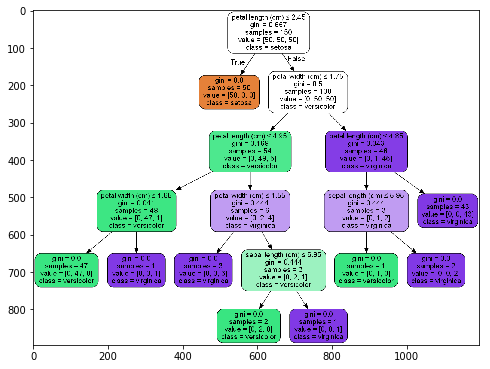

0

In [8]:
# Se importa la librería para llamar al sistema y generar los archivos
import os

# Llamada al constructor del árbol de decisión con la configuración apropiada
arbolDecision = tree.DecisionTreeClassifier()
arbolDecision = arbolDecision.fit(iris.data, iris.target)
# Definición de los nombres de los ficheros a almacenar
nombreFicheroDOT = 'arbol.dot'
nombreFicheroPNG = 'arbol.png'
nombreFicheroPDF = 'arbol.pdf'
# Generación del archivo .dot con la información para visualizar el árbol de decisión
with open(nombreFicheroDOT, 'w') as f:
    tree.export_graphviz(arbolDecision, out_file=f, feature_names=iris.feature_names, class_names=iris.target_names,  filled=True, rounded=True,    special_characters=True) 

# Llamada al sistema para transformar el archivo .dot a un archivo .png
os.system("dot -T png " + nombreFicheroDOT + " -o " + nombreFicheroPNG)
# Se lee la imagen correspondiente al árbol de decisión
img=mpimg.imread(nombreFicheroPNG)
# Se muestra el árbol de decisión
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
plt.show()

# Llamada al sistema para transformar el archivo .dot a un archivo .pdf
os.system("dot -Tpdf " + nombreFicheroDOT + " -o " + nombreFicheroPDF)

A continuación vamos a mostrar como crean la superficie de decisión de los árboles de decisión. 

En este caso tenemos un problema y es que este dataset tiene 4 variables y no podemos mostrar gráficamente la frontera con todas las variables del dataset Iris. Por este motivo vamos a crear la gráfica con las dos últimas variables del dataset y generar el árbol de decisión.

0

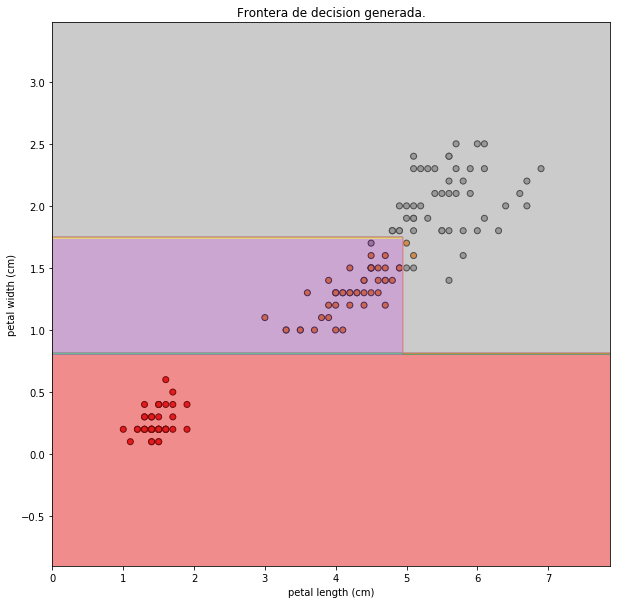

In [20]:
# Llamada al constructor del árbol de decisión con cada tipo de criterio
arbolDecision = tree.DecisionTreeClassifier(min_samples_split=8,min_samples_leaf=4)
# Aprendizaje del árbol de decisión con todos los datos del dataset Iris
arbolDecision = arbolDecision.fit(iris.data[:,2:], iris.target)

# Se calculan los mínimo y máximos de cada variable a mostrar (-1 para dar margen)
x_min = iris.data[:, -2].min() - 1
x_max = iris.data[:, -2].max() + 1
y_min = iris.data[:, -1].min() - 1
y_max = iris.data[:, -1].max() + 1

# Paso de los ejemplos que vamos a generar para mostrar la frontera de decisión
h = .02
# Se crean todas las combinaciones de valores de las dos variables comprendidos entre los mínimos y máximos con paso h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Se predicen todos los ejemplos generados (combinaciones) con la función meshgrid
Z = arbolDecision.predict(np.c_[xx.ravel(), yy.ravel()])
# Se ponen los resultados en forma de matriz para poder visualizarlos
Z = Z.reshape(xx.shape)

# Se muestran los resultados en la gráfica
#Se muestran los datos del problema: la funcion scatter muestra puntos aislados y los colorea en función de su valor
plt.figure(figsize=(10,10))
plt.scatter(iris.data[:, -2], iris.data[:, -1], c=iris.target, cmap=plt.cm.Set1,edgecolors='k')
# La función contourf colorea toda la superficie
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1,alpha=0.5)
# Se asignan etiquetas a los ejes y a la gráfica
plt.xlabel(iris.feature_names[-2])
plt.ylabel(iris.feature_names[-1])
plt.title('Frontera de decision generada.')

# Generación del archivo .dot con la información para visualizar el árbol de decisión
nombreFicheroDOT = 'frontera.dot'
nombreFicheroPDF = 'frontera.pdf'
with open(nombreFicheroDOT, 'w') as f:
    tree.export_graphviz(arbolDecision, out_file=f, feature_names=iris.feature_names[-2:], class_names=iris.target_names,  filled=True, rounded=True,    special_characters=True) 
os.system("dot -Tpdf " + nombreFicheroDOT + " -o " + nombreFicheroPDF)

Ejercicio: Resolver el problema de Iris utilizando utilizando los valores por defecto para el número mínimo de ejemplos necesario para dividir un nodo o hacerlo hoja. 
* Comparar los resultados de accuracy en función del tipo de clasificador (CART o C4.5).
* Mostrar también la matriz de confusión de ambos clasificadores para visualizar mejor las diferencias (si existen).

NOTA:
* Recordar que para obtener las medidas de rendimiento de los clasificadores se puede utilizar la librería metrics

In [26]:
# Se importa el paquete de métricas de rendimiento
from sklearn import metrics
# Lista para almacenar los accuracies
acc= []
# Para cada tipo de árbol (CART y C4.5)
for tipoArbol in ['gini','entropy']:
    # LLamada al constructor del árbol de decisión
    arbolDecision = tree.DecisionTreeClassifier(criterion  = tipoArbol)
    # Entrenamiento del árbol de decisión
    arbolDecision = arbolDecision.fit(iris.data, iris.target)
    # Se realizan las predicciones del árbol de decisión con los ejemplos de entrenamiento
    predicciones = arbolDecision.predict(iris.data)
    # Se obtiene el rendimiento (accuracy)
    accuracy = metrics.accuracy_score(predicciones, iris.target)*100.0
    # Se imprime la información del tipo de árbol, rendimientos, número de nodos y profundidad máxima
    print(tipoArbol, accuracy)
    print(metrics.confusion_matrix(predicciones, iris.target))
    print("Numero de nodos {}".format(arbolDecision.tree_.node_count))
    print("Maxima profundidad {}".format(arbolDecision.tree_.max_depth))
    # Se añade el accuracy a la lista
    acc.append(accuracy)

gini 100.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Numero de nodos 17
Maxima profundidad 5
entropy 100.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Numero de nodos 17
Maxima profundidad 5


Los árboles de decisión asignan una importancia a cada variable. La importancia de cada variable (en tanto por uno) la podemos encontrar en el campo *feature\_importances_* del objeto del árbol de decisión creado y entrenado.

A partir de dicho atributo podemos crear una gráfica en la que analicemos la importancia de cada variable para solucionar el problema.

La importancia de la variable petal length (cm) es: 67.7744
La importancia de la variable petal width (cm) es: 30.71135
La importancia de la variable sepal length (cm) es: 1.51424
La importancia de la variable sepal width (cm) es: 0.0


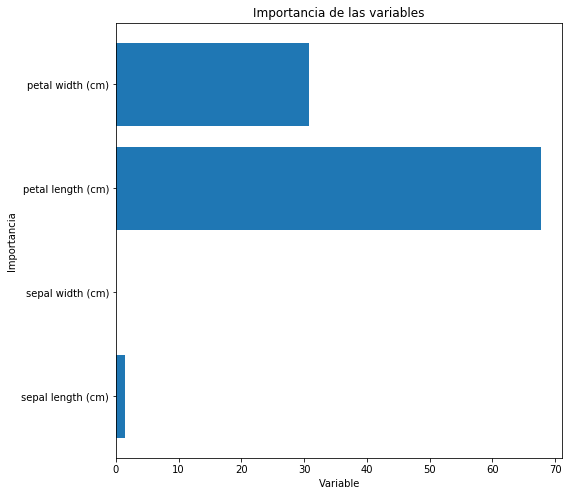

In [31]:
# LLamada al constructor del árbol de decisión con la segunda configuración
arbolDecision = tree.DecisionTreeClassifier(criterion  = 'entropy', min_samples_split=10, min_samples_leaf= 5)
# Entrenamiento del árbol de decisión
arbolDecision = arbolDecision.fit(iris.data, iris.target)

# obtener una lista con la importancia de cada variable dada por el random forest en tanto por cien
# importancias =
# BEGIN SOLUTION
importancias = list(arbolDecision.feature_importances_*100.0)
# END SOLUTION
# Vamos a emparejar cada valor con el nombre de cada variable (cada pareja será una tupla)
variables_importancia = [(nombreVar, round(importancia, 5)) for nombreVar, importancia in zip(iris.feature_names, importancias)]
# Vamos a ordenar las variable de acuerdo a su importancia (de mayor a menor importancia)
variables_importancia = sorted(variables_importancia, key = lambda x: x[1], reverse = True)
# Imprimimos el nombre de cada variable y su importancia
for nomVar, imp in variables_importancia:
    print("La importancia de la variable {} es: {}".format(nomVar, imp))

# Creamos una figura de barras horizontales (plt.barh) con la misma información (sin ordenar por importancia: orden original de variables)
    # Para etiquetar cada barra podéis utilizar el comando plt.yticks y poner el nombre de cada variable en cada caso
# BEGIN SOLUTION
plt.figure(figsize=(8,8))
# lista de tantos números como variables (0 a número de variables-1)
valoresY = list(range(len(importancias)))
# Creamos el gráfico de barras
plt.barh(valoresY, importancias)
# Etiquetamos cada valor del eje x con la variable correspondiente
plt.yticks(valoresY, iris.feature_names, rotation='horizontal')
# Axis labels and title
plt.ylabel('Importancia')
plt.xlabel('Variable')
plt.title('Importancia de las variables')
plt.show()
# END SOLUTION

### Extracción de variables utilizando árboles de decisión

Por último vamos a utilizar los árboles de decisión como método de selección de variables.

En primer lugar vamos a utilizar una técnica de Exploratory Data Analysis (EDA) para visualizar la importancia de las variables. La técnica es la de las coordenadas paralelas ofrecida por la librería de pandas. 

Para poder aplicarla en primer lugar tenemos que generar un DataFrame (pandas,DataFrame(data=datos, index=indices, columns=nombreColumnas)) a partir de los datos que tenemos. Para generar un DataFrame se deben especificar tres parámetros:
* data: hay que concatenar horizontalmente (función hstack de numpy) los datos de entrada con los de salida puestos en forma de columna.
* index: los índices de los ejemplos (lista con los valores desde 0 hasta el número de ejemplos del dataset.
* columns: los nombres de las variables (crear una lista con los nombres de las variables de entrada, feature_names, con el nombre de la variable de salida, 'Clase')

Realizar la gráfica correspondiente a las coordenadas paralelas del dataset Iris. Para ello se utiliza la función parallel_coordinates vista en la asignatura "Análisis y visualización de datos".

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


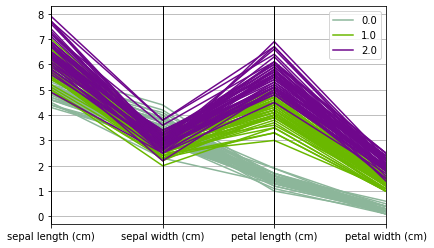

In [19]:
# Se importa la función que crea la gráfica de coordenadas paralelas
from pandas.plotting import parallel_coordinates

# Se concatenan horizontalmente los datos de entrada con los de salida
datosInOut = np.hstack((iris.data, iris.target.reshape(-1,1)))
# Se crean los índices de los ejemplos
indice = range(iris.data.shape[0])
# Se crean los nombres de las variables
nombreColumnas = iris.feature_names[:]
nombreColumnas.extend(['Clase'])
print(iris.feature_names)
# Se genera el DataFrame para poder aplicar la función parallel_coordinates
datosPanda = pd.DataFrame(data=datosInOut, index=indice, columns=nombreColumnas)
parallel_coordinates(datosPanda, 'Clase')

Según la gráfica anterior se puede comprobar como las dos variables más importantes son las dos últimas puesto que los ejemplos (líneas) son prácticamente separables utilizando dichas variables.

Ahora vamos a mostrar un gráfico de puntos (scatter) para comprobar la separabilidad entre los ejemplos de todas las clases de acuerdo a estas dos variables más importantes.

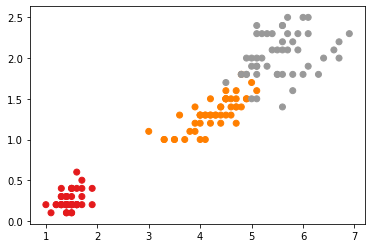

In [20]:
# Se crea un gráfico de puntos con los ejemplos de las dos variables de interés
plt.scatter(iris.data[:, -2], iris.data[:, -1], c=iris.target, cmap=plt.cm.Set1)

Una vez comprobado que las dos variables más importantes son las dos últimas (y que los ejemplos son prácticamente separables con ellas) vamos a comprobar si mediante el árbol de decisión podemos extraer estas dos mismas variables si lo aplicamos como un modelo de selección de variables.

Para ello, la librería de selección de variables (feature_selection) de Scikit-learn nos ofrece una clase que nos facilita la tarea. Esta clase es la llamada SelectFromModel y su información se puede consultar en la URL: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel. La llamada al constructor de esta clase es la siguiente:

modelo = SelectFromModel(estimator, threshold=valorUmbral)

Los parámetros son los siguientes: 
* estimator: modelo a partir del cual obtener las variables
    * Si la clase del modelo tiene un atributo que determine la importancia de las variables se puede aplicar esta clase
* threshold=valorUmbral: valor del umbral para seleccionar las variables, puede ser
    * Valor numérico: valor asignado al umbral (float)
    * String: método a utilizar, por ejemplo la mediana de los valores de la importancia de todas las variables ('median')
* Todas las que tengan una importancia mayor que el umbral establecido o generado son seleccionadas

Una vez ejecutada la llamada al constructor hemos generado un objeto (almacenado en la variable model en el código de la celda posterior) que debemos entrenar (como si fuera un clasificador). Para ello llamamos a la función fit. Una vez entrenado, podemos comprobar las variables seleccionadas ejecutando la función get_support() que devuelve una lista de booleanos con tantos elementos como variables y que tendrá valor True en las posiciones de las variables seleccionadas. 

Además, este objeto puede ser utilizado para transformar los datos y realizar la selección de variables. Para ello se utiliza la función transform del objeto almacenado en la variable model (model.transform(datosATransformar)). Esta función nos devuelve los datos de entrada pero solamente de las variables seleccionadas (las que estén a True al ejecutar la función get_support()).

Ejercicio: utilizando la mediana como método para calcular el umbral
* Aplicar el método de selección de variables a partir del árbol de decisión C4.5 ('entropy') con min_samples_split=10 y min_samples_leaf=5. 
* Realizar la transformación de los datos originales y guardar los datos transformados en X_new.
* Obtener la lista de booleanos con las variables seleccionadas a partir del árbol de decisión.
* Aprender de nuevo un árbol de decisión (misma configuración) con los datos en X_new.
* Calcular e imprimir el porcentaje de ejemplos correctamente clasificados.
* Mostrar y guardar el árbol de decisión generado.
* Comprobar si el árbol generado tiene sentido con la frontera de decisión generada por C4.5 y mostrada anteriormente.

Las variables seleccionadas son  ['petal length (cm)', 'petal width (cm)']
97.33333333333334


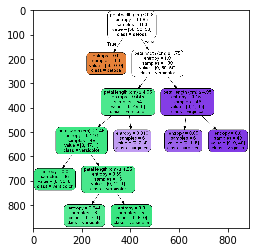

0

In [21]:
# Se importa la función que permite seleccionar variables a partir de un modelo
from sklearn.feature_selection import SelectFromModel

# Se llama al constructor del árbol de decisión
arbolDecision = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split=10, min_samples_leaf= 5)
# Se aplica la selección a partir del modelo
model = SelectFromModel(arbolDecision, threshold='median')
# Se entrena el objeto de la clase SelectFromModel
model = model.fit(iris.data, iris.target)
# Se transforman los datos originales de acuerdo a las variables seleccionadas
X_new = model.transform(iris.data)
X_new.shape

# Se obtienen las variables seleccionadas: lista de booleanos
booleanas = model.get_support()
# Se obtienen los nombres de las variables seleccionadas
variablesSeleccionadas = [iris.feature_names[i] for i in range(len(iris.feature_names)) if booleanas[i]==True]
print("Las variables seleccionadas son ", variablesSeleccionadas)

# Llamada al constructor del árbol de decisión
arbolDecision = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split=10, min_samples_leaf= 5)
# Entrenamiento del árbol de decisión con los datos transformados
arbolDecision = arbolDecision.fit(X_new, iris.target)
# Predicción de las clases de los datos transformados
predicciones = arbolDecision.predict(X_new)
# Se obtiene el accuracy del nuevo árbol
accuracy = metrics.accuracy_score(predicciones, iris.target)*100.0
print(accuracy)


# Se muestra el nuevo árbol de decisión aprendido
nombreFicheroDOT = 'arbolSelVar.dot'
nombreFicheroPNG = 'arbolSelVar.png'
nombreFicheroPDF = 'arbolSelVar.pdf'
with open(nombreFicheroDOT, 'w') as f:
    tree.export_graphviz(arbolDecision, out_file=f, feature_names=variablesSeleccionadas, class_names=iris.target_names,  filled=True, rounded=True,    special_characters=True) 

os.system("dot -T png " + nombreFicheroDOT + " -o " + nombreFicheroPNG)
img=mpimg.imread(nombreFicheroPNG)
imgplot = plt.imshow(img)
plt.show()
os.system("dot -Tpdf " + nombreFicheroDOT + " -o " + nombreFicheroPDF)

Fijaros que ambos árboles de decisión (C4.5 y CART) clasifican todos los ejemplos correctamente. Esto es debido a que los árboles de decisión tienden a sobre-entrenar y, por tanto, los árboles generados pueden ser muy complicados para las características de los ejemplos de entrenamiento. Visualizaremos los árboles de decisión generados más adelante para que comprobéis este hecho.

Para tratar de no realizar árboles muy complicados (ajustados a los datos de entrenamiento) podemos utilizar los valores de los atributos:
* min_samples_split: este atributo determina el número mínimo de ejemplos que debe tener un nodo interno para dividirlo más.
    * Cuanto mayor sea el valor antes se parará de dividir y el árbol será más simple (normalmente implica obtener un accuracy menor para train).
    * Cuanto más bajo sea este valor más fácil será que los nodos se dividan y más se ajustará el árbol a los datos de entrenamiento (normalmente implica obtener un accuracy mayor para train).
* min_samples_leaf: este atributo determina el número mínimo de ejemplos que debe tener un nodo para generar una hoja. Si no llega a este valor no se genera el nodo hoja.
    * Cuanto mayor sea este valor más difícil será generar nodos hoja y, por tanto, el árbol generado será más simple. Suele implicar perder accuracy en train.

Ejercicio: repetir el código anterior estableciendo el valor de los parámetros min_samples_split y min_samples_leaf a:
    * 6 y 3, respectivamente.
    * 10 y 5, respectivamente.
Comprobar si el porcentaje de acierto aumenta o disminuye.

In [27]:
# Lista para almacenar los accuracies
acc= []
# Para cada tipo de árbol (CART y C4.5)
for tipoArbol in ['gini','entropy']:
    # LLamada al constructor del árbol de decisión con la primera configuración
    arbolDecision = tree.DecisionTreeClassifier(criterion  = tipoArbol, min_samples_split=6, min_samples_leaf= 3)
    # Entrenamiento del árbol de decisión
    arbolDecision = arbolDecision.fit(iris.data, iris.target)
    # Se realizan las predicciones del árbol de decisión con los ejemplos de entrenamiento
    predicciones = arbolDecision.predict(iris.data)
    # Se obtiene el rendimiento (accuracy)
    accuracy = metrics.accuracy_score(predicciones, iris.target)*100.0
    # Se imprime la información del tipo de árbol, rendimientos, número de nodos y profundidad máxima
    print(tipoArbol, accuracy)
    print(metrics.confusion_matrix(predicciones, iris.target))
    print("Numero de nodos {}".format(arbolDecision.tree_.node_count))
    print("Maxima profundidad {}".format(arbolDecision.tree_.max_depth))
    # Se añade el accuracy a la lista
    acc.append(accuracy)

gini 98.0
[[50  0  0]
 [ 0 49  2]
 [ 0  1 48]]
Numero de nodos 13
Maxima profundidad 4
entropy 98.0
[[50  0  0]
 [ 0 49  2]
 [ 0  1 48]]
Numero de nodos 13
Maxima profundidad 4


In [28]:
# Lista para almacenar los accuracies
acc= []
# Para cada tipo de árbol (CART y C4.5)
for tipoArbol in ['gini','entropy']:
    # LLamada al constructor del árbol de decisión con la segunda configuración
    arbolDecision = tree.DecisionTreeClassifier(criterion  = tipoArbol, min_samples_split=10, min_samples_leaf= 5)
    # Entrenamiento del árbol de decisión
    arbolDecision = arbolDecision.fit(iris.data, iris.target)
    # Se realizan las predicciones del árbol de decisión con los ejemplos de entrenamiento
    predicciones = arbolDecision.predict(iris.data)
    # Se obtiene el rendimiento (accuracy)
    accuracy = metrics.accuracy_score(predicciones, iris.target)*100.0
    # Se imprime la información del tipo de árbol, rendimientos, número de nodos y profundidad máxima
    print(tipoArbol, accuracy)
    print(metrics.confusion_matrix(predicciones, iris.target))
    print("Numero de nodos {}".format(arbolDecision.tree_.node_count))
    print("Maxima profundidad {}".format(arbolDecision.tree_.max_depth))
    # Se añade el accuracy a la lista
    acc.append(accuracy)

gini 97.33333333333334
[[50  0  0]
 [ 0 47  1]
 [ 0  3 49]]
Numero de nodos 11
Maxima profundidad 4
entropy 97.33333333333334
[[50  0  0]
 [ 0 47  1]
 [ 0  3 49]]
Numero de nodos 11
Maxima profundidad 4


### Árboles de decisión para problemas de regresión

Para acabar la práctica vamos a aplicar los árboles de decisión para resolver problemas de regresión. La clase de Scikit-learn correspondiente a los árboles de decisión para problemas de regresión se llama *DecisionTreeRegressor* y su información se puede ver en el siguiente enlace: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html. Como podéis observar los parámetros de la clase son los mismos que en el caso de clasificación a excepción de criterio de división de los nodos que en este caso es el error cuadrático medio (*mse*).

Para realizar esta parte de la práctica vamos a utilizar un problema que nos ofrece la librería Scikit-learn. Este problema consiste en predecir el valor de casas de Boston. Para poder leer los datos debéis utilizar la función *load_boston* de Scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html. La lectura de datos nos da un objeto dataset como los que hemos utilizado en prácticas anteriores.

Importar la función y leer los datos del problema. Almacenad el contenido en una variable llamada boston. Podéis ver la descripción del problema imprimiendo el campo *DESCR* del objeto.

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

A continuación vamos a dividir los datos en dos conjuntos: uno para entrenar el árbol de deicisión (70% de los ejemplos) y otro para testear la calidad del mismo. Fijamos la semilla de Numpy a 987.

In [38]:
from sklearn import model_selection

X = boston.data
y = boston.target

np.random.seed(987)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size=0.7)

A continuación se debe resolver el problema utilizando un un árbol de decisión con todos sus valores por defecto excepto la semilla que la fijamos a 123. 

Debéis entrenar el árbol de decisión y obtener el rendimiento. Para medir el rendimiento vamos a utilizar la raíz cuadrada del error cuadrática medio la raíz pone el error en el dominio original de la variable a predecir). Recordad que la función que nos calcula el error cuadrático medio se llama *mean_squared_error*: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Además, podéis mostrar una gráfica en la que se muestre la importancia de cada variable para predecir el valor de las casas. Finalmente, podéis mostrar una gráfica (plot) en la que comparéis el valor real de las casas (en verde) con el valor predicho por el árbol de decisión (en rojo). Para que se vea bien la última gráfica es necesario ordenar los precios y mostrarlos de acuerdo a dicha ordenación.

0.0 4.47065725769595


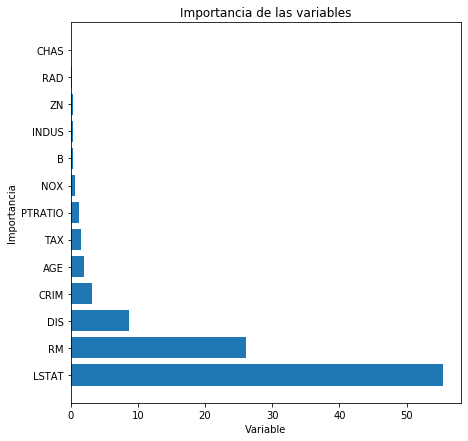

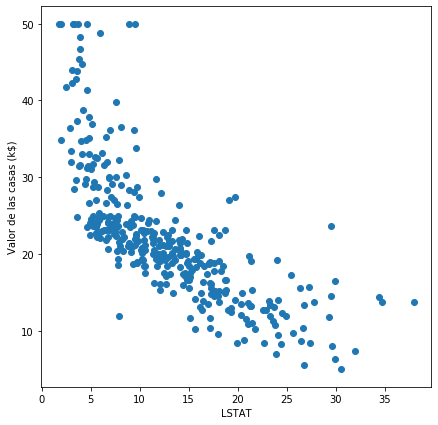

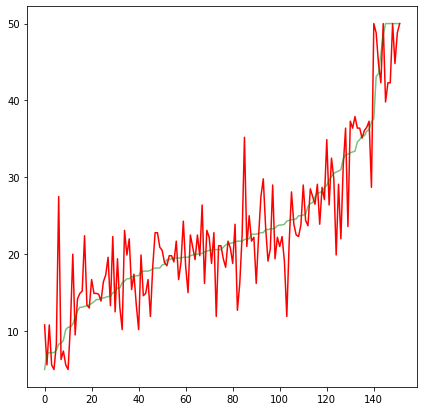

In [41]:
from sklearn.tree import DecisionTreeRegressor

DTreg = DecisionTreeRegressor(random_state=123)
DTreg.fit(X_train, y_train)

predTrainDT = DTreg.predict(X_train)
rmseTrainDT = metrics.mean_squared_error(y_train,predTrainDT)**0.5
predTestDT = DTreg.predict(X_test)
rmseTestDT = metrics.mean_squared_error(y_test,predTestDT)**0.5
print(rmseTrainDT, rmseTestDT)


fet_ind = np.argsort(DTreg.feature_importances_*100.0)[::-1]
fet_imp = DTreg.feature_importances_[fet_ind]*100.0

plt.figure(figsize=(7,7))
# lista de tantos números como variables (0 a número de variables-1)
valoresY = list(range(len(fet_imp)))
# Creamos el gráfico de barras
plt.barh(valoresY, fet_imp)
# Etiquetamos cada valor del eje x con la variable correspondiente
plt.yticks(valoresY, boston.feature_names[fet_ind], rotation='horizontal')
# Axis labels and title
plt.ylabel('Importancia')
plt.xlabel('Variable')
plt.title('Importancia de las variables')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(X_train[:, fet_ind[0]], y_train)
plt.xlabel( boston.feature_names[fet_ind[0]])
plt.ylabel('Valor de las casas (k$)')
plt.show()

indices = np.argsort(y_test)
plt.figure(figsize=(7,7))
plt.plot(np.arange(indices.size), predTestDT[indices], '-r')
plt.plot(np.arange(indices.size), y_test[indices], '-g', alpha=0.5)
plt.show()